# Bike sharing analysis
Group Assignment - **Section 1 Group D** - *Submitted: 25.03.2022*

![Bike](https://i0.wp.com/enjoymiamibeach.com/wp-content/uploads/2016/07/citi-bike-rental-miami-beach-2.jpg?ssl=1)

### Table of Contents:
1. Introduction
2. Exploratory analysis
3. Feature engineering
4. Data visualization
5. ML predictive analytics
6. Findings

---
## 1. Introduction

xx

In [1]:
# pip install holidays

In [2]:
# pip install xgboost

In [3]:
import holidays
import datetime
from ipywidgets import interact
import matplotlib.dates as mdates

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.compose import (ColumnTransformer, make_column_transformer, make_column_selector)
from sklearn.pipeline import (Pipeline, make_pipeline)
from sklearn.preprocessing import (FunctionTransformer, OneHotEncoder, StandardScaler, RobustScaler)
from sklearn.impute import (SimpleImputer, KNNImputer)
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

In [5]:
import warnings
# warnings.filterwarnings('ignore')

In [6]:
seed = 49

In [7]:
sns.set()

In [8]:
df = pd.read_csv("hour.csv", index_col = "instant")

---
## 2. Exploratory analysis

In [9]:
df.describe()

hr          temp         atemp           hum     windspeed  \
count  17379.000000  17280.000000  17279.000000  17279.000000  17279.000000   
mean      11.546752      0.497071      0.475530      0.627235      0.190114   
std        6.914405      0.192474      0.171782      0.193047      0.122378   
min        0.000000      0.020000      0.000000      0.000000      0.000000   
25%        6.000000      0.340000      0.333300      0.480000      0.104500   
50%       12.000000      0.500000      0.484800      0.630000      0.194000   
75%       18.000000      0.660000      0.621200      0.780000      0.253700   
max       23.000000      1.000000      1.000000      1.000000      0.850700   

             casual    registered           cnt  
count  17379.000000  17379.000000  17379.000000  
mean      35.676218    153.786869    189.463088  
std       49.305030    151.357286    181.387599  
min        0.000000      0.000000      1.000000  
25%        4.000000     34.000000     40.000000  
50%       17.000000    115.000000    142.000000  
75%       48.000000    220.000000    281.000000  
max      367.000000    886.000000    977.000000

In [10]:
df.dtypes

dteday         object
hr              int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
df.isnull().sum()

dteday          0
hr              0
weathersit    100
temp           99
atemp         100
hum           100
windspeed     100
casual          0
registered      0
cnt             0
dtype: int64

In [12]:
# Handle NaN in chapter 5 through Imputer function

In [13]:
df.index.is_unique

True

In [14]:
df.index.is_monotonic_increasing

True

---
## 3. Feature engineering

In [15]:
df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = pd.DatetimeIndex(df['dteday']).month
df['day'] = pd.DatetimeIndex(df['dteday']).day
df['weekday'] = pd.DatetimeIndex(df['dteday']).weekday
df.tail()

dteday  hr                                         weathersit  \
instant                                                                      
17375    2012-12-31  19  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   
17376    2012-12-31  20  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   
17377    2012-12-31  21    Clear, Few clouds, Partly cloudy, Partly cloudy   
17378    2012-12-31  22    Clear, Few clouds, Partly cloudy, Partly cloudy   
17379    2012-12-31  23    Clear, Few clouds, Partly cloudy, Partly cloudy   

         temp   atemp   hum  windspeed  casual  registered  cnt  year  month  \
instant                                                                        
17375    0.26  0.2576  0.60     0.1642      11         108  119  2012     12   
17376    0.26  0.2576  0.60     0.1642       8          81   89  2012     12   
17377    0.26  0.2576  0.60     0.1642       7          83   90  2012     12   
17378    0.26  0.2727  0.56     0.1343      13          48   61  2012     12   
17379    0.26  0.2727  0.65     0.1343      12          37   49  2012     12   

         day  weekday  
instant                
17375     31        0  
17376     31        0  
17377     31        0  
17378     31        0  
17379     31        0

In [16]:
df['weekend'] = np.where(df['weekday'].isin([5, 6]), 1, 0)

In [17]:
seasons = {1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4, 12:1}
df['season'] = df['month'].apply(lambda x: seasons[x])

In [18]:
us_holidays_list = []
for date in holidays.UnitedStates(years=[2011, 2012]).items():
    us_holidays_list.append(str(date[0]))

In [19]:
df['holiday'] = np.where(df['dteday'].isin(us_holidays_list), 1, 0)

In [20]:
df['rushhour'] = np.where(df['hr'].isin([7, 8, 16, 17, 18, 19]), 1, 0)

In [21]:
df

dteday  hr                                         weathersit  \
instant                                                                      
1        2011-01-01   0    Clear, Few clouds, Partly cloudy, Partly cloudy   
2        2011-01-01   1    Clear, Few clouds, Partly cloudy, Partly cloudy   
3        2011-01-01   2    Clear, Few clouds, Partly cloudy, Partly cloudy   
4        2011-01-01   3    Clear, Few clouds, Partly cloudy, Partly cloudy   
5        2011-01-01   4    Clear, Few clouds, Partly cloudy, Partly cloudy   
...             ...  ..                                                ...   
17375    2012-12-31  19  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   
17376    2012-12-31  20  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   
17377    2012-12-31  21    Clear, Few clouds, Partly cloudy, Partly cloudy   
17378    2012-12-31  22    Clear, Few clouds, Partly cloudy, Partly cloudy   
17379    2012-12-31  23    Clear, Few clouds, Partly cloudy, Partly cloudy   

         temp   atemp   hum  windspeed  casual  registered  cnt  year  month  \
instant                                                                        
1        0.24  0.2879  0.81     0.0000       3          13   16  2011      1   
2        0.22  0.2727  0.80     0.0000       8          32   40  2011      1   
3        0.22  0.2727  0.80     0.0000       5          27   32  2011      1   
4        0.24  0.2879  0.75     0.0000       3          10   13  2011      1   
5        0.24  0.2879  0.75     0.0000       0           1    1  2011      1   
...       ...     ...   ...        ...     ...         ...  ...   ...    ...   
17375    0.26  0.2576  0.60     0.1642      11         108  119  2012     12   
17376    0.26  0.2576  0.60     0.1642       8          81   89  2012     12   
17377    0.26  0.2576  0.60     0.1642       7          83   90  2012     12   
17378    0.26  0.2727  0.56     0.1343      13          48   61  2012     12   
17379    0.26  0.2727  0.65     0.1343      12          37   49  2012     12   

         day  weekday  weekend  season  holiday  rushhour  
instant                                                    
1          1        5        1       1        1         0  
2          1        5        1       1        1         0  
3          1        5        1       1        1         0  
4          1        5        1       1        1         0  
5          1        5        1       1        1         0  
...      ...      ...      ...     ...      ...       ...  
17375     31        0        0       1        0         1  
17376     31        0        0       1        0         0  
17377     31        0        0       1        0         0  
17378     31        0        0       1        0         0  
17379     31        0        0       1        0         0  

[17379 rows x 18 columns]

---
## 4. Data visualization

---
### 4.1 Correlation

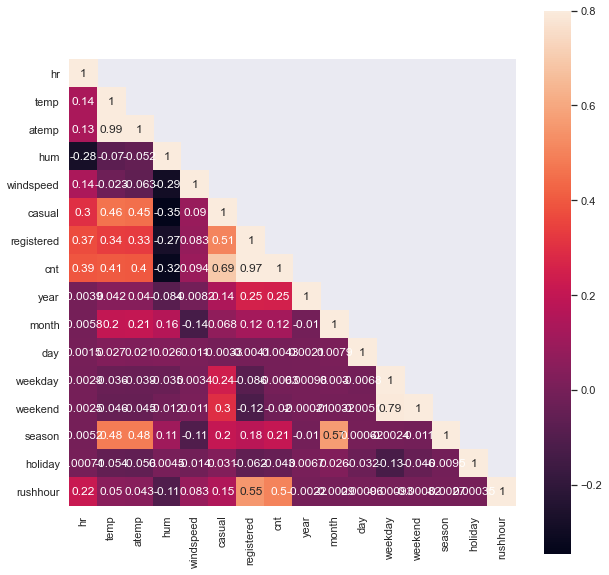

In [22]:
fig, ax = plt.subplots(figsize=(10,10))  
corrMatrix = df.corr()
mask=np.array(corrMatrix)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corrMatrix,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)

plt.show()

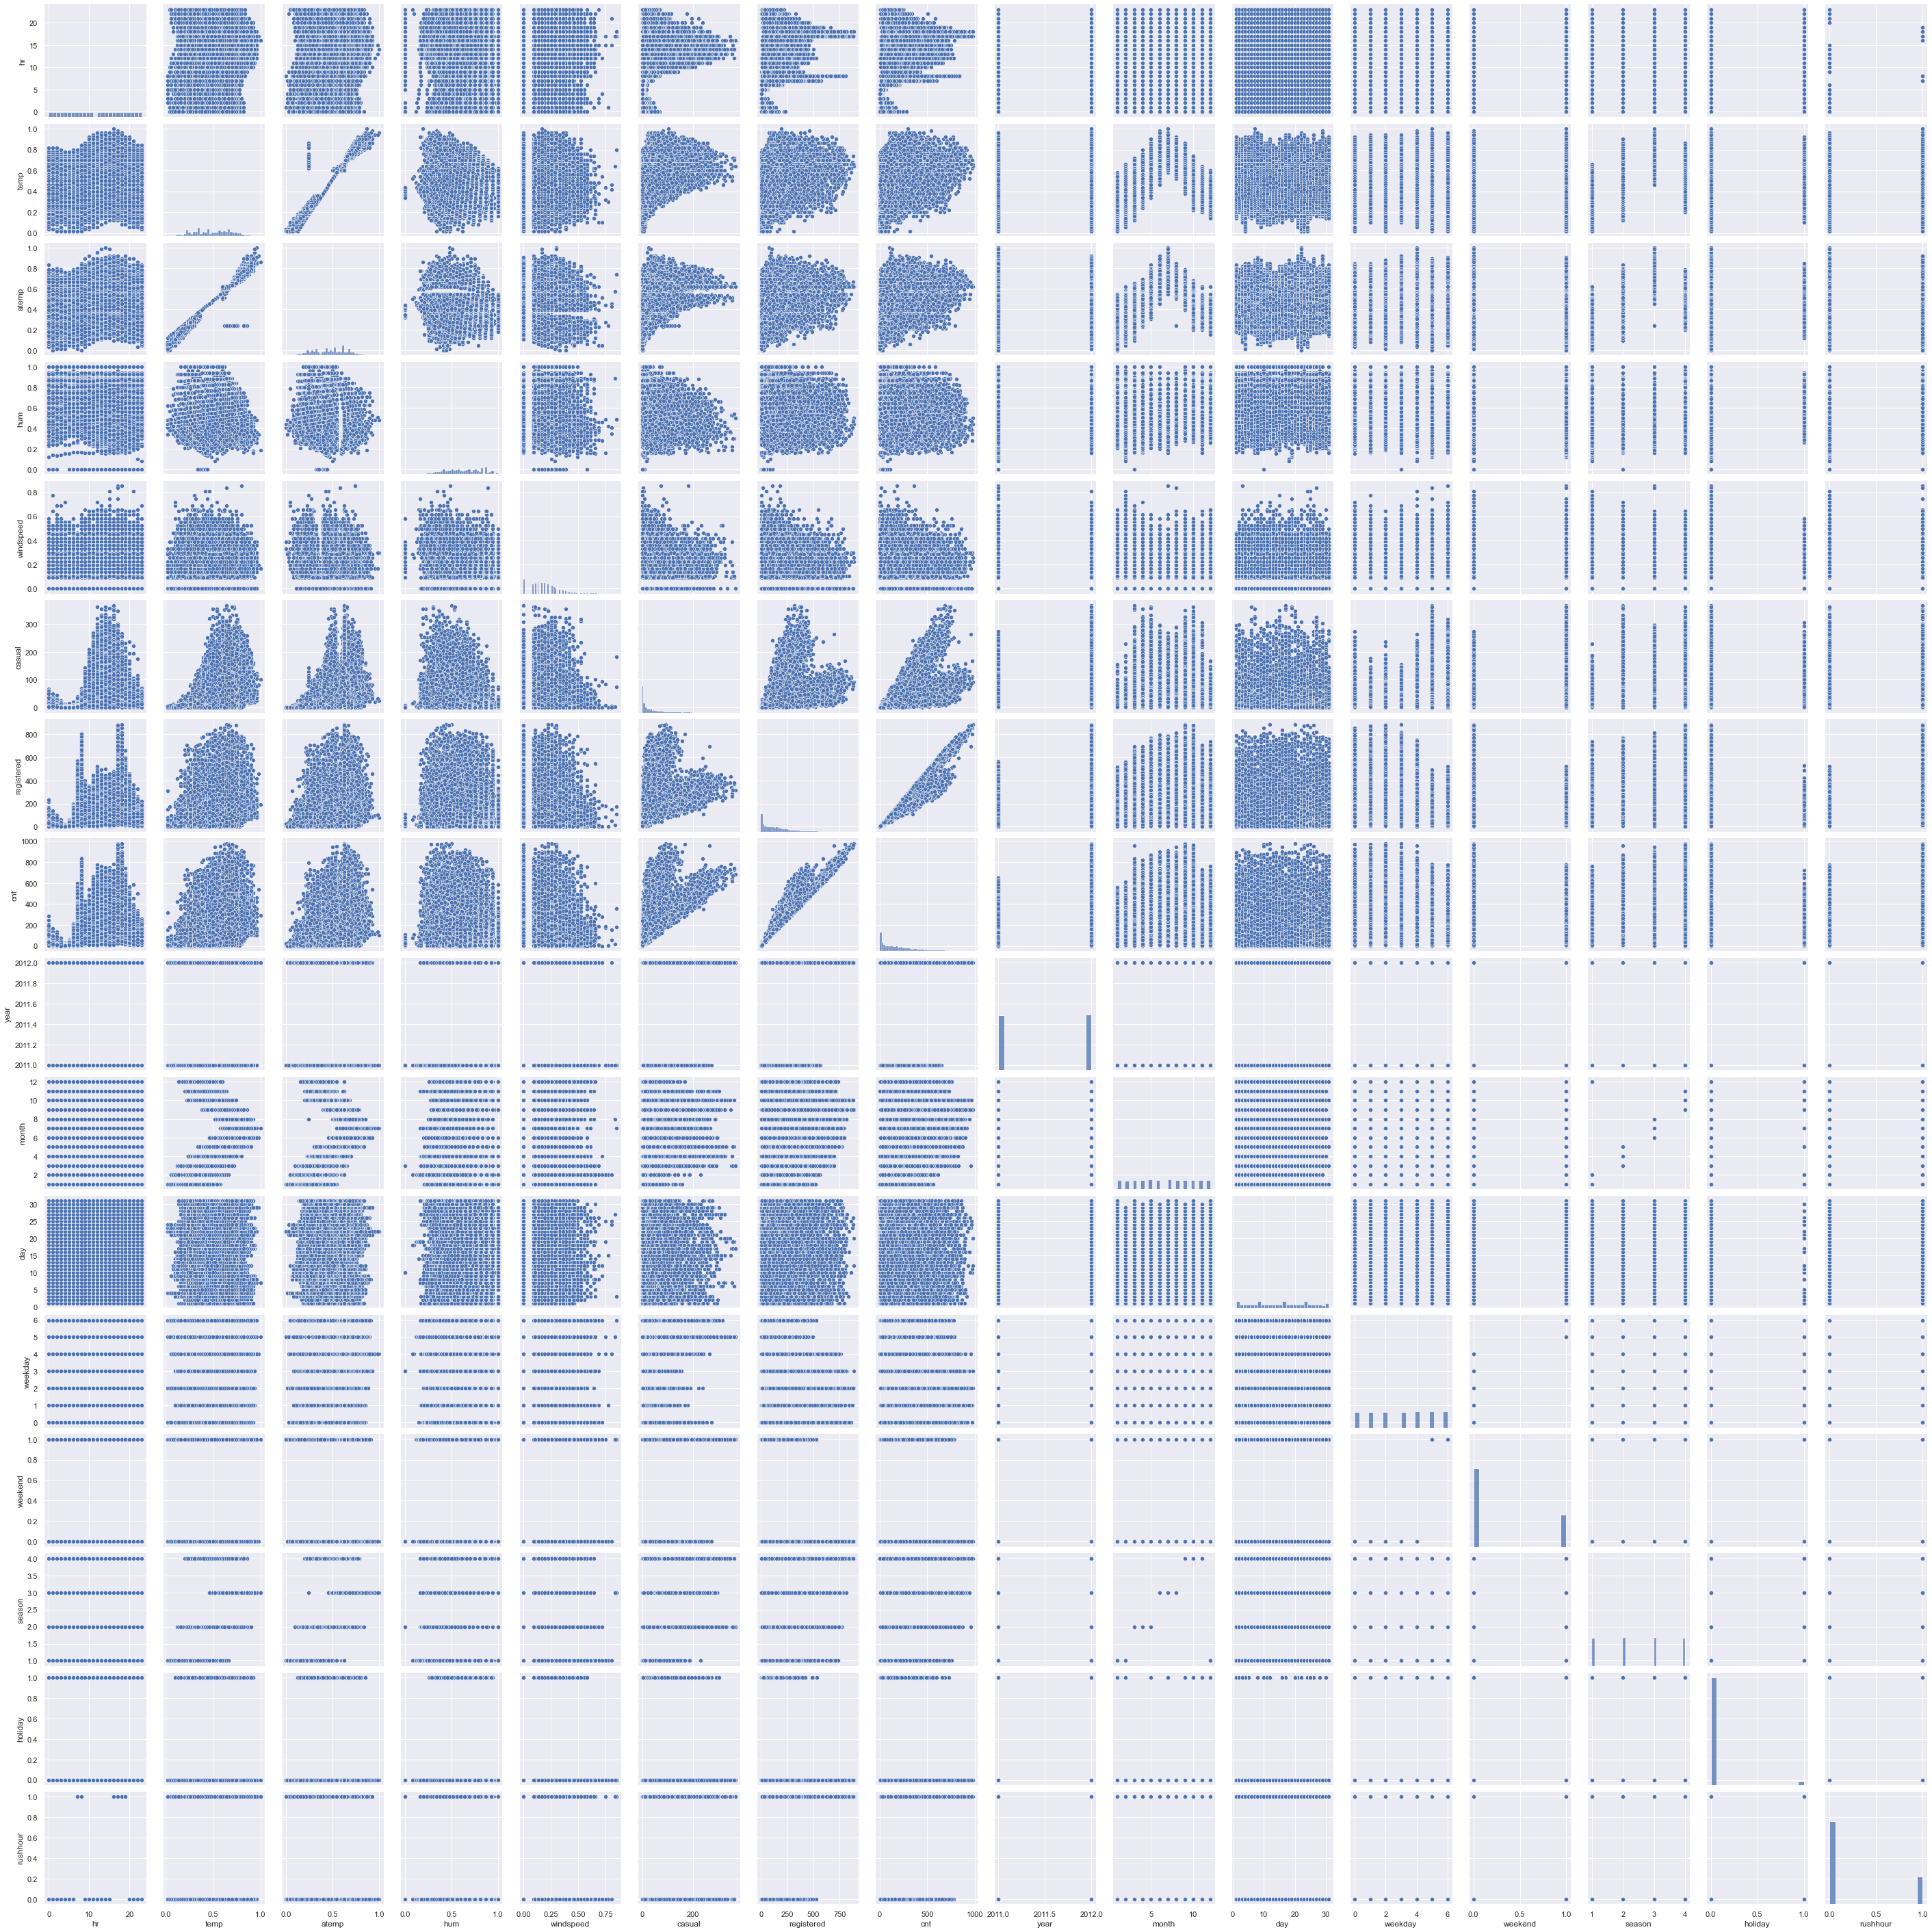

In [23]:
sns.pairplot(df)

---
### 4.2 Time series per feature

In [24]:
daily_rides = df.groupby(['dteday'])['cnt'].sum()
dayofmonth_rides = df.groupby(['day'])['cnt'].mean()
dayofweek_rides = df.groupby(['weekday'])['cnt'].mean()
hour_rides = df.groupby(['hr'])['cnt'].mean()

<AxesSubplot:xlabel='Date', ylabel='Ride Count'>

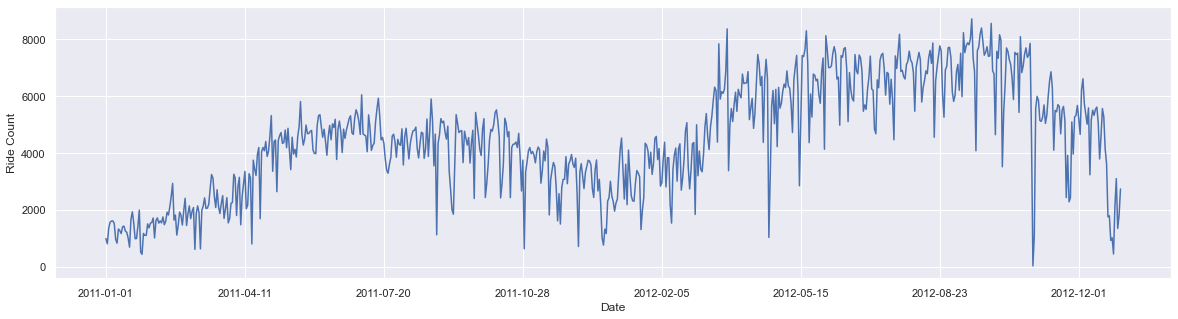

In [25]:
daily_rides.plot.line(xlabel="Date", ylabel="Ride Count",figsize=(20, 5))

<AxesSubplot:xlabel='Day', ylabel='Ride Count'>

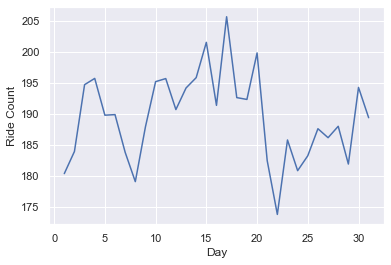

In [26]:
dayofmonth_rides.plot.line(xlabel="Day", ylabel="Ride Count")

<AxesSubplot:xlabel='Day', ylabel='Ride Count'>

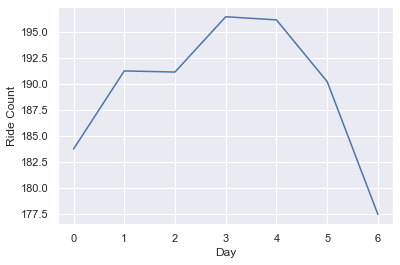

In [27]:
dayofweek_rides.plot.line(xlabel="Day", ylabel="Ride Count")

<AxesSubplot:xlabel='Day', ylabel='Ride Count'>

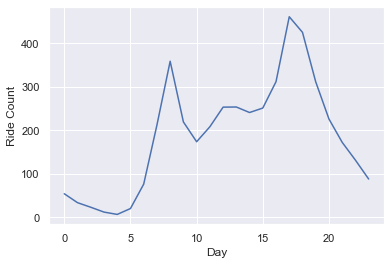

In [28]:
hour_rides.plot.line(x='hr', y='cnt', xlabel="Day", ylabel="Ride Count")

<function matplotlib.pyplot.show(close=None, block=None)>

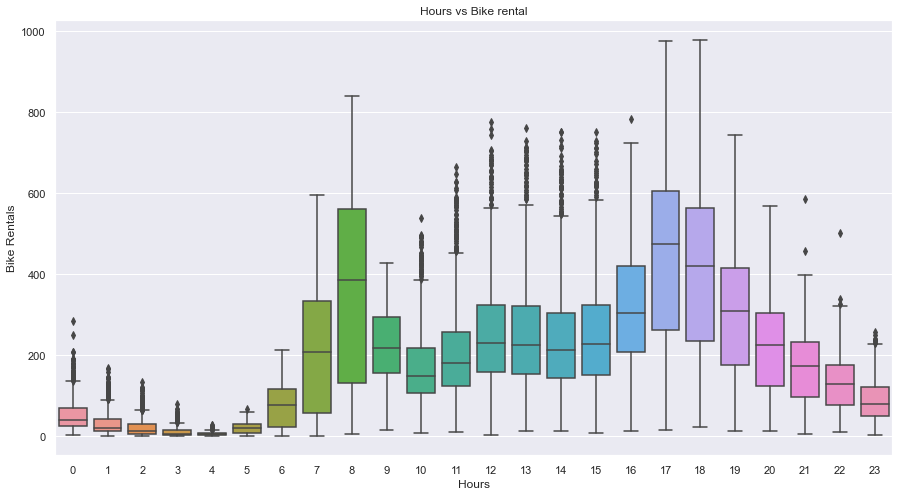

In [29]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(x = "hr", y = "cnt", data = df)
plt.title("Hours vs Bike rental")
plt.xlabel("Hours")
plt.ylabel("Bike Rentals")
plt.show

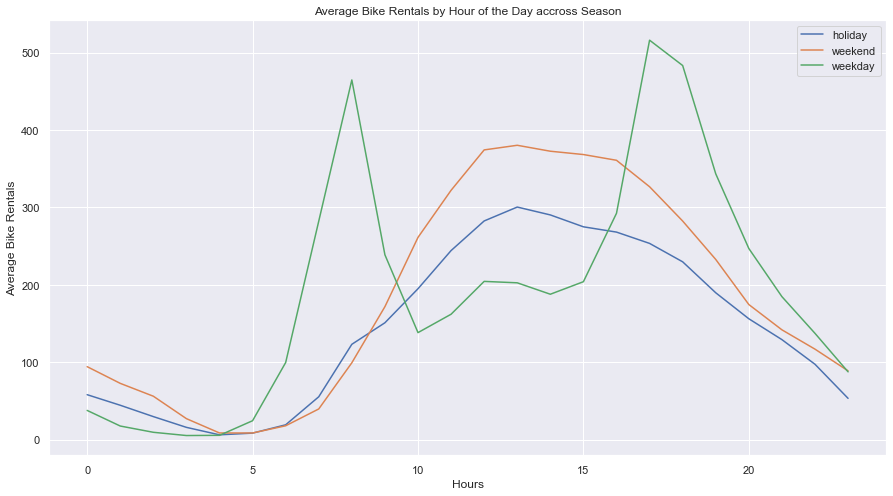

In [30]:
avg_holiday = df.loc[df["holiday"] == 1, "cnt"].groupby(df["hr"]).mean()
avg_weekend = df.loc[df["weekend"] == 1, "cnt"].groupby(df["hr"]).mean()
avg_weekday = df.loc[df["weekend"] == 0, "cnt"].groupby(df["hr"]).mean()

fig, ax = plt.subplots(figsize = (15,8))

ax.plot(df["hr"].unique(), avg_holiday, label = "holiday")
ax.plot(df["hr"].unique(), avg_weekend, label = "weekend")
ax.plot(df["hr"].unique(), avg_weekday, label = "weekday")

ax.set_xlabel("Hours")
ax.set_ylabel("Average Bike Rentals")
ax.set_title("Average Bike Rentals by Hour of the Day accross Season")

ax.legend()

# ax.set_xticks(df["hr"].unique())

---
### 4.3 Anaylsis of seasonality

Text(15.146327777777778, 0.5, 'Xx')

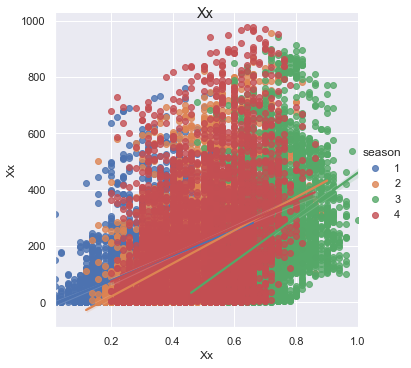

In [31]:
sns.lmplot(x="temp", y="cnt", data=df, hue="season")
plt.suptitle("Xx")
plt.xlabel("Xx")
plt.ylabel("Xx")

Text(15.146327777777778, 0.5, 'Xx')

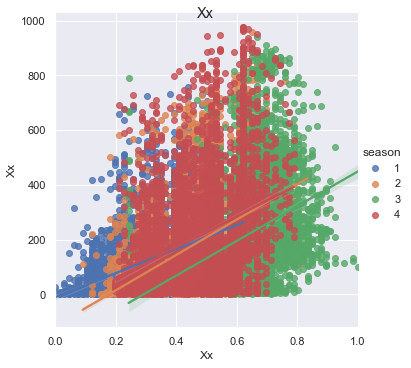

In [32]:
sns.lmplot(x="atemp", y="cnt", data=df, hue="season")
plt.suptitle("Xx")
plt.xlabel("Xx")
plt.ylabel("Xx")

Text(15.146327777777778, 0.5, 'Xx')

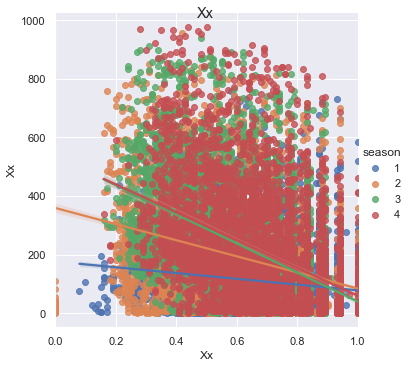

In [33]:
sns.lmplot(x="hum", y="cnt", data=df, hue="season")
plt.suptitle("Xx")
plt.xlabel("Xx")
plt.ylabel("Xx")

Text(15.146327777777778, 0.5, 'Xx')

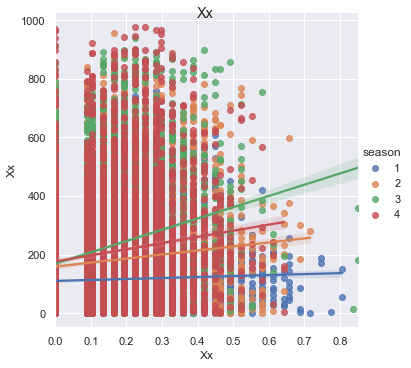

In [34]:
sns.lmplot(x="windspeed", y="cnt", data=df, hue="season")
plt.suptitle("Xx")
plt.xlabel("Xx")
plt.ylabel("Xx")

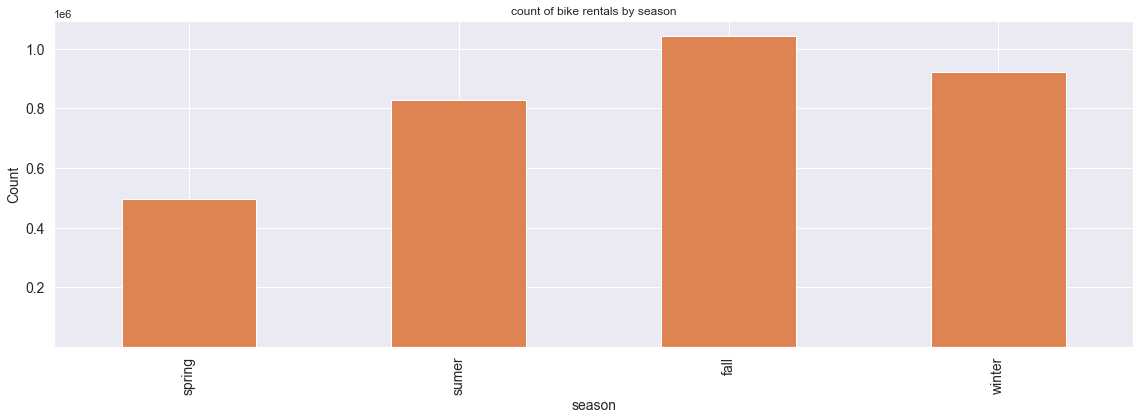

In [35]:
fig, ax  =  plt.subplots(figsize=(16, 6))

ax = df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar', 
                                       legend = False, title ="count of bike rentals by season", 
                                         stacked=True, fontsize=14, ax=ax)
ax.set_xlabel("season", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_xticklabels(['spring','sumer','fall','winter'])

fig.tight_layout()

---
### 4.4 Anaylsis of weather

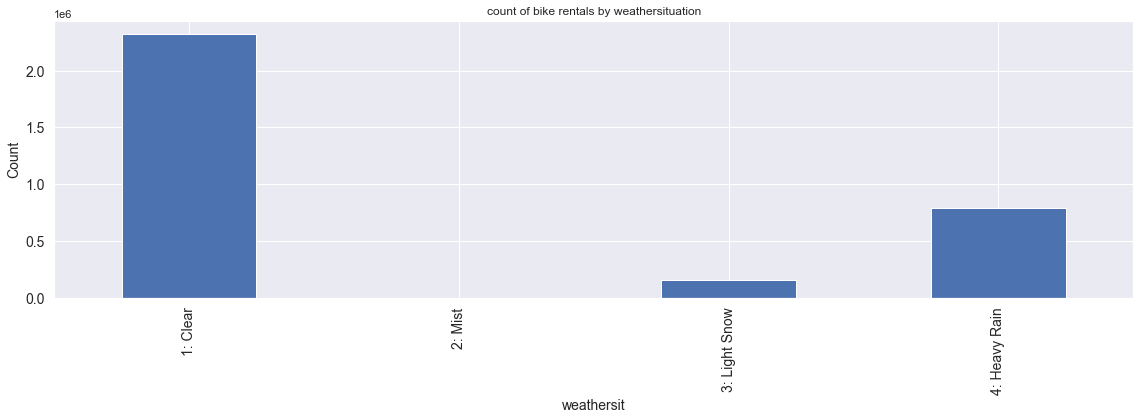

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))
 
ax = df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="count of bike rentals by weathersituation", fontsize=14, ax=ax)#
ax.set_xlabel("weathersit", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

fig.tight_layout()

In [37]:
df_hist = df[["temp", "atemp","hum","windspeed"]]

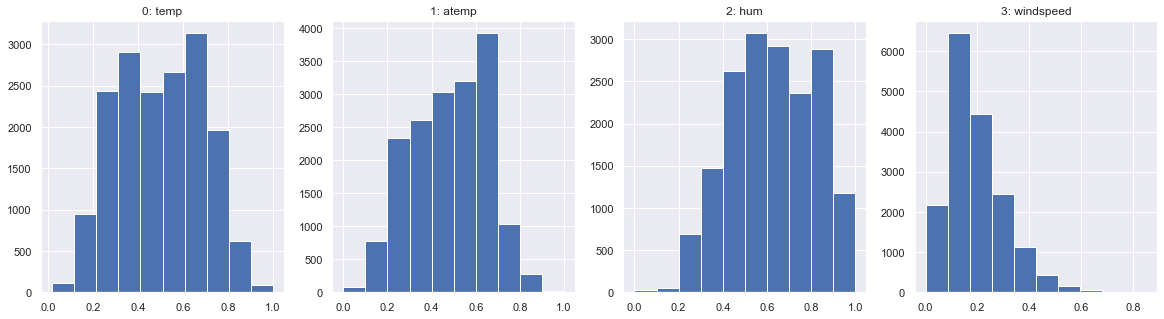

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes.ravel()):
    ax.hist(df_hist.iloc[:, i], bins=10)
    ax.set_title("{}: {}".format(i, df_hist.columns[i]))

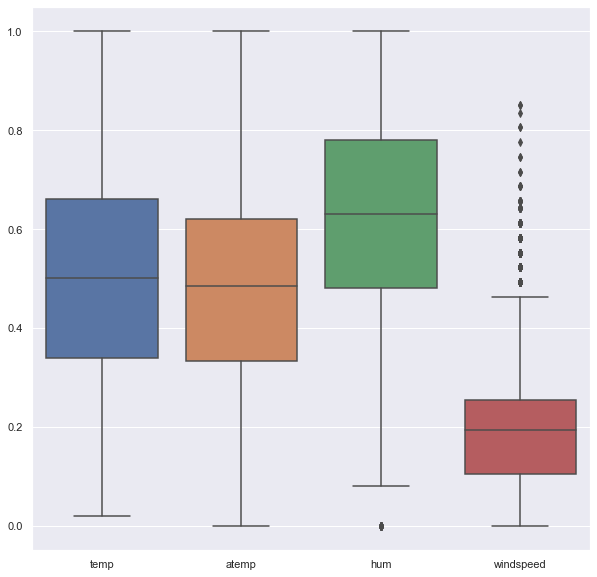

In [39]:
sns.boxplot(data=df[['temp',
       'atemp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

---
## 5. ML Predictive Analytics

---
### 5.1 Model setup

In [40]:
sklearn.set_config(display="diagram")

In [41]:
X = df.drop(columns=["casual", "registered", "cnt", "temp"])
y = df['cnt']

In [42]:
X_train = X.loc[X['dteday']  < '2012-10-01']
X_test = X.loc[X['dteday']  >= '2012-10-01']
y_train = y.loc[X['dteday']  < '2012-10-01'] 
y_test = y.loc[X['dteday']  >= '2012-10-01']

In [43]:
X_train = X_train.drop(columns="dteday")
X_test = X_test.drop(columns="dteday")

---
### 5.2 Pipeline setup

In [44]:
numerical_pipeline = make_pipeline(
    RobustScaler(), 
    SimpleImputer(strategy = "median")
)

In [45]:
weathersit_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown="ignore")
)   

In [46]:
ct = ColumnTransformer([
    ("transform_dates", OneHotEncoder(sparse=False, handle_unknown="ignore"),["hr","month", "day", "weekday", "season"]),
    ("transform_weather", weathersit_pipeline, ["weathersit"]),
    ("impute_numerical", numerical_pipeline, make_column_selector(dtype_include="number"))
])

In [47]:
ct.fit_transform(X)

array([[ 1.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  1.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  1., ..., -2.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  0.,  0.],
       [ 0.,  0.,  0., ..., -2.,  0.,  0.],
       [ 0.,  0.,  0., ..., -2.,  0.,  0.]])

In [48]:
clf = Pipeline([
    ("preprocessing", ct),
    ("regression", RandomForestRegressor())
])
clf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('transform_dates',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['hr', 'month', 'day',
                                                   'weekday', 'season']),
                                                 ('transform_weather',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['weathersit']),
                                                 ('impute_numerical',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001336A512A60>)])),
                ('regression', RandomForestRegressor())])

In [49]:
# clf.get_params().keys()

---
### 5.3 Grid Search

In [50]:
param_grid = [
    {
        "regression": [LinearRegression()],
    },
    {
        "regression": [DecisionTreeRegressor()], 
        "regression__random_state": [seed],
    },
    {
        "regression": [RandomForestRegressor()],
        "regression__random_state": [seed],
    },
    {
        "regression": [SVR()]
    },
    {
        "regression": [AdaBoostRegressor()], 
    },
    {
        "regression": [BaggingRegressor()], 
    }
]
param_grid

[{'regression': [LinearRegression()]},
 {'regression': [DecisionTreeRegressor()], 'regression__random_state': [49]},
 {'regression': [RandomForestRegressor()], 'regression__random_state': [49]},
 {'regression': [SVR()]},
 {'regression': [AdaBoostRegressor()]},
 {'regression': [BaggingRegressor()]}]

param_grid = [
    {
        "regression": [LinearRegression()],
        "regression__normalize": [True,False],

        "preprocessing__impute_numerical__simpleimputer__n_neighbors": range (10,12),
        "preprocessing__impute_numerical__simpleimputer": [KNNImputer()]
    },
    {
        "regression": [LinearRegression()],
        "regression__normalize": [True,False],  
        
        "preprocessing__impute_numerical__simpleimputer": ["mean","median"],
        "preprocessing__impute_numerical__simpleimputer": [SimpleImputer()]
    },
    {
        "regression": [DecisionTreeRegressor()], 
        "regression__max_depth": range(3,12),
        "regression__random_state": [seed],

        "preprocessing__impute_numerical__simpleimputer__n_neighbors": range (10,12),
        "preprocessing__impute_numerical__simpleimputer": [KNNImputer()]
    },
    {
        "regression": [DecisionTreeRegressor()], 
        "regression__max_depth": range(3,12),
        "regression__random_state": [seed],
        
        "preprocessing__impute_numerical__simpleimputer": ["mean","median"],
        "preprocessing__impute_numerical__simpleimputer": [SimpleImputer()]
    },
    {
        "regression": [RandomForestRegressor()],
        "regression__max_depth": range(3,12),
        "regression__n_estimators": range(40,50), 
        "regression__max_features": [0.7],
        "regression__random_state": [seed],
        
        "preprocessing__impute_numerical__simpleimputer__n_neighbors": range (10,12),
        "preprocessing__impute_numerical__simpleimputer": [KNNImputer()]
    },
    {
        "regression": [RandomForestRegressor()],
        "regression__max_depth": range(3,12),
        "regression__n_estimators": range(40,50), 
        "regression__max_features": [0.7],
        "regression__random_state": [seed],
        
        "preprocessing__impute_numerical__simpleimputer": ["mean","median"],
        "preprocessing__impute_numerical__simpleimputer": [SimpleImputer()]
    } 
]
param_grid

In [51]:
gs = GridSearchCV(clf, param_grid=param_grid, n_jobs=-1, cv=5, scoring="r2")
gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('transform_dates',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['hr',
                                                                          'month',
                                                                          'day',
                                                                          'weekday',
                                                                          'season']),
                                                                        ('transform_weather',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ign...
                                       ('regression',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regression': [LinearRegression()]},
                         {'regression': [DecisionTreeRegressor()],
                          'regression__random_state': [49]},
                         {'regression': [RandomForestRegressor()],
                          'regression__random_state': [49]},
                         {'regression': [SVR()]},
                         {'regression': [AdaBoostRegressor()]},
                         {'regression': [BaggingRegressor()]}],
             scoring='r2')

In [52]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('transform_dates',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['hr',
                                                                          'month',
                                                                          'day',
                                                                          'weekday',
                                                                          'season']),
                                                                        ('transform_weather',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ign...
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regression': [LinearRegression()]},
                         {'regression': [DecisionTreeRegressor()],
                          'regression__random_state': [49]},
                         {'regression': [RandomForestRegressor(random_state=49)],
                          'regression__random_state': [49]},
                         {'regression': [SVR()]},
                         {'regression': [AdaBoostRegressor()]},
                         {'regression': [BaggingRegressor()]}],
             scoring='r2')

---
### 5.4 Evaluation

In [53]:
gs.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('transform_dates',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['hr', 'month', 'day',
                                                   'weekday', 'season']),
                                                 ('transform_weather',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['weathersit']),
                                                 ('impute_numerical',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001336A327C40>)])),
                ('regression', RandomForestRegressor(random_state=49))])

In [54]:
gs.best_params_

{'regression': RandomForestRegressor(random_state=49),
 'regression__random_state': 49}

In [55]:
gs.best_score_

0.7147867273629973

In [56]:
test_scores = gs.cv_results_['mean_test_score']

In [57]:
# results = pd.DataFrame(gs.cv_results_)
results = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2      21.934419      0.196726         0.127895        0.007169   
5       3.279824      0.309184         0.113806        0.016263   
1       0.491486      0.041719         0.023537        0.001493   
3      32.807509      2.055806        37.723018       46.741475   
4       7.478976      0.782125         0.208261        0.050617   
0       0.219214      0.015837         0.028324        0.002054   

                         param_regression param_regression__random_state  \
2  RandomForestRegressor(random_state=49)                             49   
5                      BaggingRegressor()                            NaN   
1                 DecisionTreeRegressor()                             49   
3                                   SVR()                            NaN   
4                     AdaBoostRegressor()                            NaN   
0                      LinearRegression()                            NaN   

                                              params  split0_test_score  \
2  {'regression': RandomForestRegressor(random_st...           0.248016   
5                 {'regression': BaggingRegressor()}           0.198619   
1  {'regression': DecisionTreeRegressor(), 'regre...           0.224961   
3                              {'regression': SVR()}           0.454879   
4                {'regression': AdaBoostRegressor()}          -0.434689   
0                 {'regression': LinearRegression()}           0.017391   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2           0.823515       7.754008e-01           0.869738           0.857264   
5           0.808328       7.679712e-01           0.853503           0.867539   
1           0.789582       6.590107e-01           0.752897           0.783251   
3           0.539049       4.480161e-01           0.228028           0.141799   
4           0.369722       4.078521e-01           0.650184           0.595246   
0           0.682873      -1.438771e+26           0.671545           0.589839   

   mean_test_score  std_test_score  rank_test_score  
2     7.147867e-01    2.356610e-01                1  
5     6.991922e-01    2.527319e-01                2  
1     6.419403e-01    2.136546e-01                3  
3     3.623543e-01    1.508694e-01                4  
4     3.176630e-01    3.910242e-01                5  
0    -2.877541e+25    5.755082e+25                6

In [58]:
gs.best_estimator_.score(X_test, y_test)

0.8601559107296705

---
### 5.5 Prediction

In [59]:
predictions = gs.best_estimator_.predict(X_test)

In [60]:
comparison = y_test.to_frame()
comparison["predictions"] = predictions
comparison

cnt  predictions
instant                  
15212     45        49.36
15213     18        15.73
15214     12        11.89
15215      7         6.81
15216     10         6.90
...      ...          ...
17375    119       320.74
17376     89       163.27
17377     90       119.20
17378     61       106.83
17379     49        63.81

[2168 rows x 2 columns]

In [61]:
r2_score(comparison["cnt"],comparison["predictions"])

0.8601559107296705

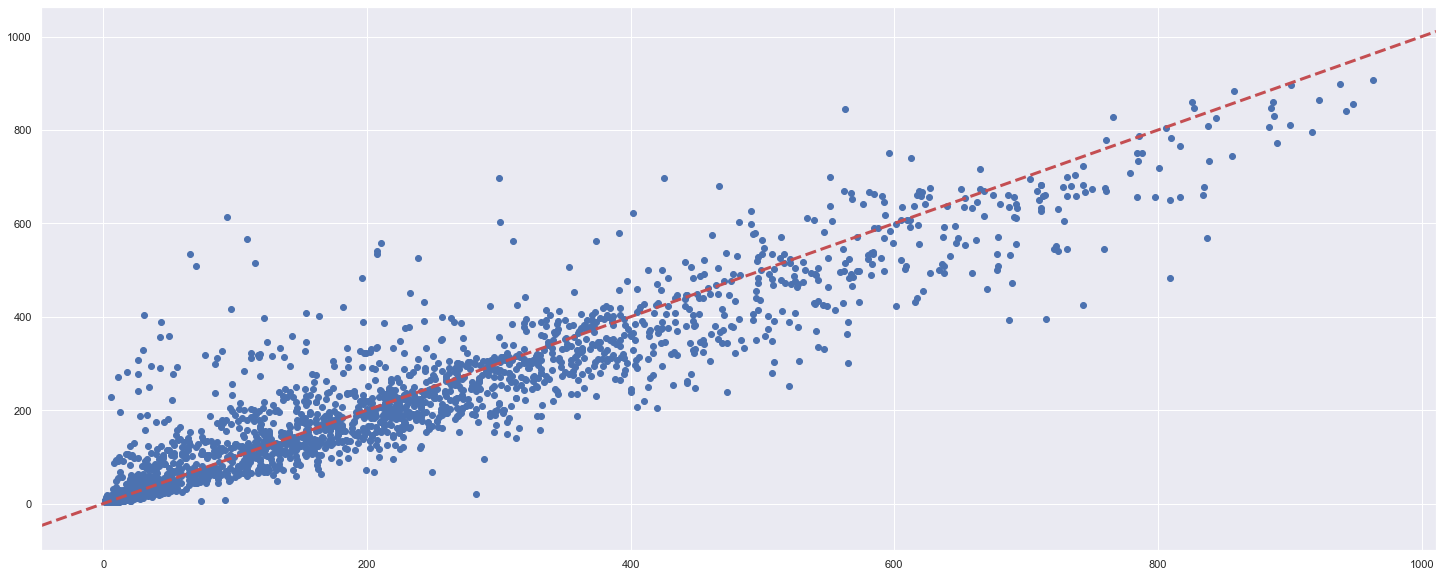

In [62]:
fig, ax = plt.subplots(figsize = (25,10))
ax.scatter(comparison["cnt"], comparison["predictions"])

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, scalex = False, color = "r", linestyle = "--", lw = 3)

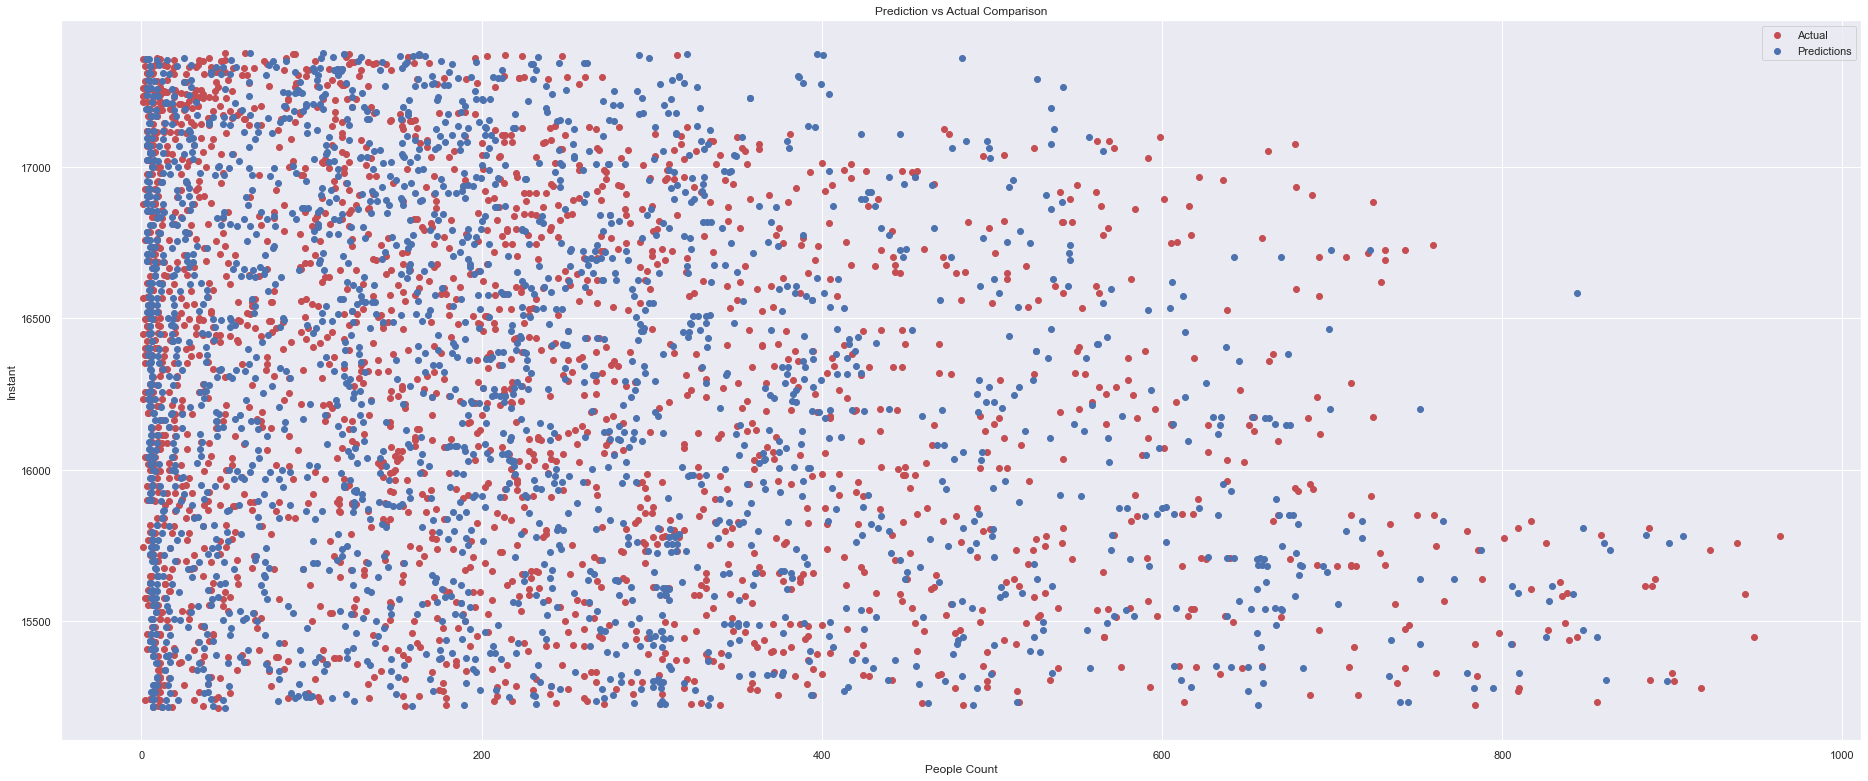

In [63]:
actual_scatter = comparison["cnt"]
prediction_scatter = comparison["predictions"]
grades_range = comparison.index
fig=plt.figure()

fig.set_size_inches(25, 10, forward=True)
ax=fig.add_axes([0,0,1,1])
ax.scatter(actual_scatter, grades_range, color='r', label="Actual")
ax.scatter(prediction_scatter, grades_range, color='b', label="Predictions")
ax.set_xlabel('People Count')
ax.set_ylabel('Instant')
ax.set_title('Prediction vs Actual Comparison')

plt.legend()
plt.show()

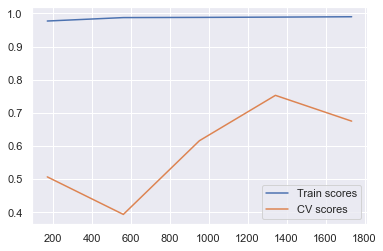

In [64]:
# determines cross-validated training and test scores for different training set sizes.

train_sizes, train_scores, cv_scores = learning_curve(gs.best_estimator_, X_test, y_test, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train scores")
plt.plot(train_sizes, cv_scores.mean(axis=1), label="CV scores")

plt.legend()

---
## 6. Findings

https://www.kaggle.com/code/hmavrodiev/bike-sharing-prediction-rf-xgboost/notebook